In [4]:
import matplotlib.pyplot as plt
import numpy as np
from causalbench.data.datasets import read_datasets_summary_as_dataframe

In [7]:
df = read_datasets_summary_as_dataframe()
df.head()

,name,var_num,sample_num,varsortability,last_updated
0,Alarm1_s500_v1,37,500,0.867550,Mon Feb 27 20:34:22 2023
1,Alarm1_s500_v2,37,500,0.864238,Mon Feb 27 20:34:22 2023
2,Alarm1_s500_v3,37,500,0.867550,Mon Feb 27 20:34:22 2023
3,Alarm1_s500_v4,37,500,0.867550,Mon Feb 27 20:34:22 2023
4,Alarm1_s500_v5,37,500,0.847682,Mon Feb 27 20:34:22 2023


In [30]:
# extract group from name. Datasets belong to the same group when they share the same true graph.
def extract_group(name):
    
    if '-' in name:#case of feedback
        return name.split('.')[1] 
    elif 'real' in name:
        return name
    elif 'numdata' in name:
        return name
    elif '_' in name:
        return name.split('_')[0]
    else:
        return name

In [31]:
df['group'] = df['name'].apply(extract_group)

In [32]:
df

,name,var_num,sample_num,varsortability,last_updated,group
0,Alarm1_s500_v1,37,500,0.867550,Mon Feb 27 20:34:22 2023,Alarm1
1,Alarm1_s500_v2,37,500,0.864238,Mon Feb 27 20:34:22 2023,Alarm1
2,Alarm1_s500_v3,37,500,0.867550,Mon Feb 27 20:34:22 2023,Alarm1
3,Alarm1_s500_v4,37,500,0.867550,Mon Feb 27 20:34:22 2023,Alarm1
4,Alarm1_s500_v5,37,500,0.847682,Mon Feb 27 20:34:22 2023,Alarm1
...,...,...,...,...,...,...
1789,link_s5000_v6,724,5000,0.286048,Tue Feb 28 13:52:14 2023,link
1790,link_s5000_v7,724,5000,0.289454,Tue Feb 28 13:54:49 2023,link
1791,link_s5000_v8,724,5000,0.287060,Tue Feb 28 13:57:23 2023,link
1792,link_s5000_v9,724,5000,0.291511,Tue Feb 28 13:59:54 2023,link


In [41]:
group_df = df.groupby('group')['varsortability'].apply(list)
group_df

group
Alarm1           [0.8675496688741722, 0.8642384105960265, 0.867...
Alarm10          [0.7557698839766166, 0.7441675456316929, 0.742...
Alarm3           [0.8078802687843616, 0.8210140500916311, 0.814...
Alarm5           [0.8464022140221402, 0.8057349323493235, 0.795...
Barley           [0.4178601516427969, 0.4111204717775906, 0.429...
                                       ...                        
postgres                                                    [0.65]
real_auto_mpg                                 [0.4888888888888889]
real_cites                                                 [0.125]
real_yacht                                              [0.734375]
sachs                                         [0.5851648351648352]
Name: varsortability, Length: 92, dtype: object

In [64]:
group_df.keys()

Index(['Alarm1', 'Alarm10', 'Alarm3', 'Alarm5', 'Barley',
       'Big_G3_v1_numdata.csv', 'Big_G3_v2_numdata.csv',
       'Big_G3_v3_numdata.csv', 'Big_G3_v4_numdata.csv',
       'Big_G3_v5_numdata.csv', 'Child', 'Child10', 'Child3', 'Child5',
       'G2_v1_confounders_numdata.csv', 'G2_v1_numdata.csv',
       'G2_v2_confounders_numdata.csv', 'G2_v2_numdata.csv',
       'G2_v3_confounders_numdata.csv', 'G2_v3_numdata.csv',
       'G2_v4_confounders_numdata.csv', 'G2_v4_numdata.csv',
       'G2_v5_confounders_numdata.csv', 'G2_v5_numdata.csv',
       'G3_v1_confounders_numdata.csv', 'G3_v1_numdata.csv',
       'G3_v2_confounders_numdata.csv', 'G3_v2_numdata.csv',
       'G3_v3_confounders_numdata.csv', 'G3_v3_numdata.csv',
       'G3_v4_confounders_numdata.csv', 'G3_v4_numdata.csv',
       'G3_v5_confounders_numdata.csv', 'G3_v5_numdata.csv',
       'G4_v1_confounders_numdata.csv', 'G4_v1_numdata.csv',
       'G4_v2_confounders_numdata.csv', 'G4_v2_numdata.csv',
       'G4_v3_confounder

In [51]:
# filter out groups which has only one member.
keys_of_group_with_multiple_values = []
keys_origin = group_df.keys()
for key in keys_origin:
    if len(group_df[key]) > 1:
        keys_of_group_with_multiple_values.append(key)
keys_of_group_with_multiple_values 

['Alarm1',
 'Alarm10',
 'Alarm3',
 'Alarm5',
 'Barley',
 'Child',
 'Child10',
 'Child3',
 'Child5',
 'Gene',
 'HailFinder',
 'HailFinder10',
 'HailFinder3',
 'HailFinder5',
 'Insurance',
 'Insurance10',
 'Insurance3',
 'Insurance5',
 'Network1_amp',
 'Network2_amp',
 'Network3_amp',
 'Network4_amp',
 'Network5_amp',
 'Network5_cont',
 'Network5_cont_p3n7',
 'Network5_cont_p7n3',
 'Network6_amp',
 'Network6_cont',
 'Network7_amp',
 'Network7_cont',
 'Network8_amp_amp',
 'Network8_amp_cont',
 'Network8_cont_amp',
 'Network9_amp_amp',
 'Network9_amp_cont',
 'Network9_cont_amp',
 'dream4',
 'link',
 'mildew',
 'munin1',
 'pigs']

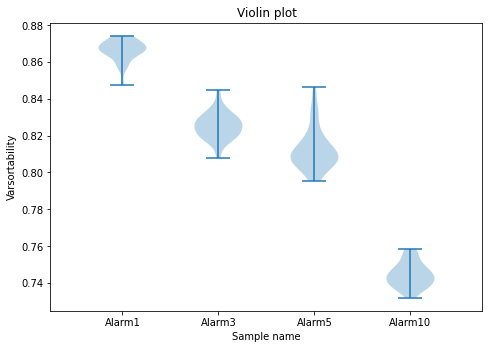

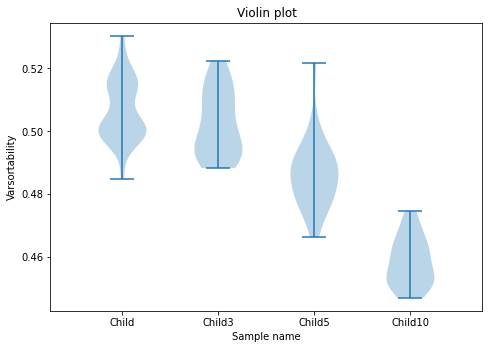

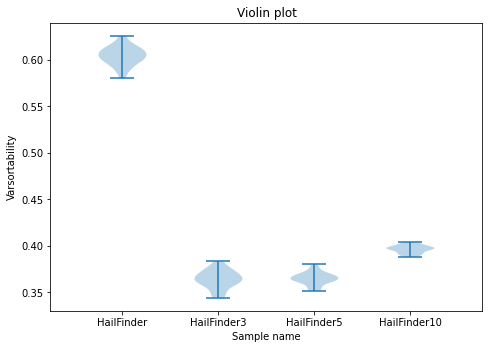

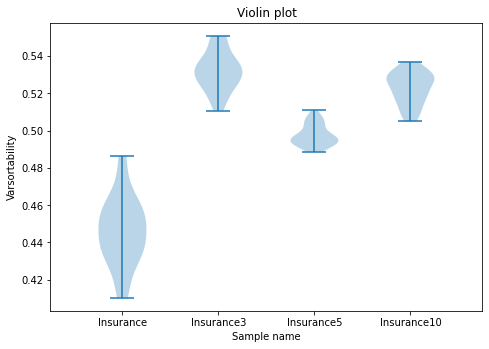

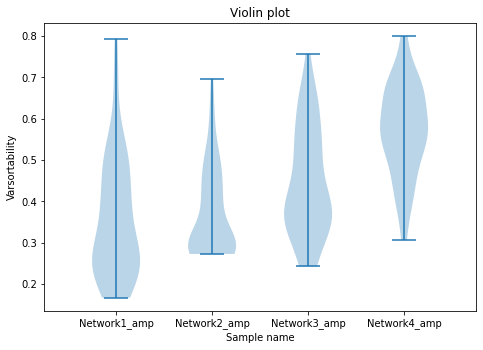

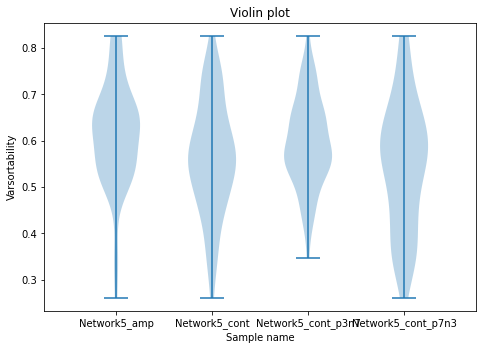

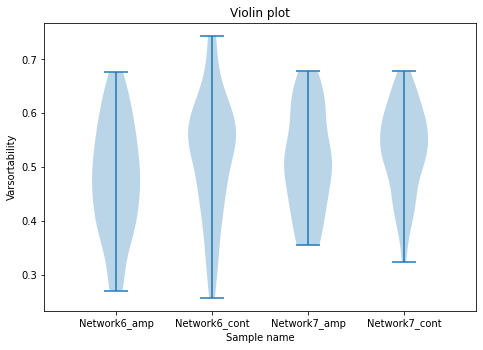

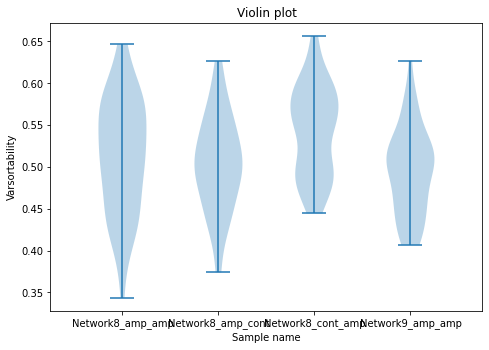

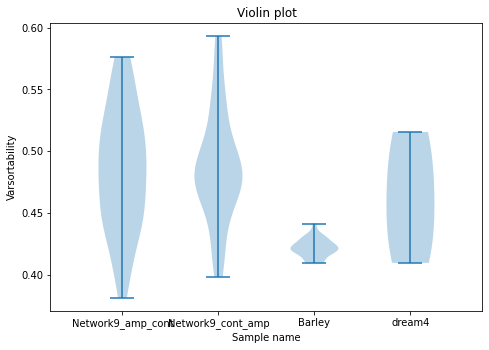

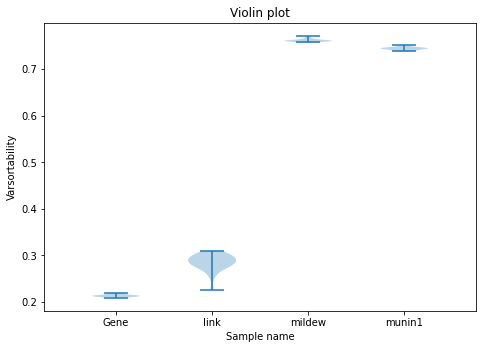

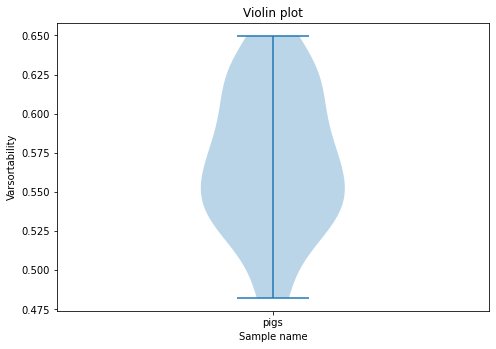

In [81]:
keys_reordered = ['Alarm1',
 'Alarm3',
 'Alarm5',
 'Alarm10',
 'Child',
 'Child3',
 'Child5',
 'Child10',
 'HailFinder',
 'HailFinder3',
 'HailFinder5',
 'HailFinder10',
 'Insurance',
 'Insurance3',
 'Insurance5',
 'Insurance10',
 'Network1_amp',
 'Network2_amp',
 'Network3_amp',
 'Network4_amp',
 'Network5_amp',
 'Network5_cont',
 'Network5_cont_p3n7',
 'Network5_cont_p7n3',
 'Network6_amp',
 'Network6_cont',
 'Network7_amp',
 'Network7_cont',
 'Network8_amp_amp',
 'Network8_amp_cont',
 'Network8_cont_amp',
 'Network9_amp_amp',
 'Network9_amp_cont',
 'Network9_cont_amp',
 'Barley',
 'dream4',
 'Gene',
 'link',
 'mildew',
 'munin1',
 'pigs']
# for key in keys_reordered:
#     data_to_plot = group_df[key]
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.set_title(key)
#     ax.set_ylabel('Varsortability')
#     bp = ax.violinplot(data_to_plot)
#     plt.show()
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
def plot_group_violin():
    for i in range(0, len(keys_reordered), 4):
        stop =  i + 4 if i + 4 < len(keys_reordered) else len(keys_reordered)

        keys_to_plot = keys_reordered[i:stop]
        data_to_plot = [group_df[key] for key in keys_to_plot]
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.set_title('Violin plot')
        ax.set_ylabel('Varsortability')
        ax.violinplot(data_to_plot)
        set_axis_style(ax, keys_to_plot)
        plt.subplots_adjust(bottom=0.15, wspace=0.35)
        plt.show()

plot_group_violin()    

In [73]:
real = ['jdk', 'postgres', 'real_auto_mpg', 'real_cites', 'real_yacht','sachs']
semi_syn = ['Alarm1', 'Alarm10', 'Alarm3', 'Alarm5', 'Barley', 'Child', 'Child10', 'Child3', 'Child5','Gene',
       'HailFinder', 'HailFinder10', 'HailFinder3', 'HailFinder5', 'Insurance',
       'Insurance10', 'Insurance3', 'Insurance5', 'link', 'mildew', 'munin1', 'pigs', 'dream4']
syn = ['Big_G3_v1_numdata.csv', 'Big_G3_v2_numdata.csv',
       'Big_G3_v3_numdata.csv', 'Big_G3_v4_numdata.csv',
       'Big_G3_v5_numdata.csv',
       'G2_v1_confounders_numdata.csv', 'G2_v1_numdata.csv',
       'G2_v2_confounders_numdata.csv', 'G2_v2_numdata.csv',
       'G2_v3_confounders_numdata.csv', 'G2_v3_numdata.csv',
       'G2_v4_confounders_numdata.csv', 'G2_v4_numdata.csv',
       'G2_v5_confounders_numdata.csv', 'G2_v5_numdata.csv',
       'G3_v1_confounders_numdata.csv', 'G3_v1_numdata.csv',
       'G3_v2_confounders_numdata.csv', 'G3_v2_numdata.csv',
       'G3_v3_confounders_numdata.csv', 'G3_v3_numdata.csv',
       'G3_v4_confounders_numdata.csv', 'G3_v4_numdata.csv',
       'G3_v5_confounders_numdata.csv', 'G3_v5_numdata.csv',
       'G4_v1_confounders_numdata.csv', 'G4_v1_numdata.csv',
       'G4_v2_confounders_numdata.csv', 'G4_v2_numdata.csv',
       'G4_v3_confounders_numdata.csv', 'G4_v3_numdata.csv',
       'G4_v4_confounders_numdata.csv', 'G4_v4_numdata.csv',
       'G4_v5_confounders_numdata.csv', 'G4_v5_numdata.csv',
       'G5_v1_confounders_numdata.csv', 'G5_v1_numdata.csv',
       'G5_v2_confounders_numdata.csv', 'G5_v2_numdata.csv',
       'G5_v3_confounders_numdata.csv', 'G5_v3_numdata.csv',
       'G5_v4_confounders_numdata.csv', 'G5_v4_numdata.csv',
       'G5_v5_confounders_numdata.csv', 'G5_v5_numdata.csv', 'Network1_amp',
       'Network2_amp', 'Network3_amp', 'Network4_amp', 'Network5_amp',
       'Network5_cont', 'Network5_cont_p3n7', 'Network5_cont_p7n3',
       'Network6_amp', 'Network6_cont', 'Network7_amp', 'Network7_cont',
       'Network8_amp_amp', 'Network8_amp_cont', 'Network8_cont_amp',
       'Network9_amp_amp', 'Network9_amp_cont', 'Network9_cont_amp',]
def get_type(group:str):
    if group in real:
        return 'real'
    elif group in semi_syn:
        return 'semi-synthetic'
    elif group in syn:
        return 'synthetic'
    else:
        raise ValueError(f'{group} not recognized.')


In [74]:
df['type'] = df['group'].apply(get_type)
df

,name,var_num,sample_num,varsortability,last_updated,group,type
0,Alarm1_s500_v1,37,500,0.867550,Mon Feb 27 20:34:22 2023,Alarm1,semi-synthetic
1,Alarm1_s500_v2,37,500,0.864238,Mon Feb 27 20:34:22 2023,Alarm1,semi-synthetic
2,Alarm1_s500_v3,37,500,0.867550,Mon Feb 27 20:34:22 2023,Alarm1,semi-synthetic
3,Alarm1_s500_v4,37,500,0.867550,Mon Feb 27 20:34:22 2023,Alarm1,semi-synthetic
4,Alarm1_s500_v5,37,500,0.847682,Mon Feb 27 20:34:22 2023,Alarm1,semi-synthetic
...,...,...,...,...,...,...,...
1789,link_s5000_v6,724,5000,0.286048,Tue Feb 28 13:52:14 2023,link,semi-synthetic
1790,link_s5000_v7,724,5000,0.289454,Tue Feb 28 13:54:49 2023,link,semi-synthetic
1791,link_s5000_v8,724,5000,0.287060,Tue Feb 28 13:57:23 2023,link,semi-synthetic
1792,link_s5000_v9,724,5000,0.291511,Tue Feb 28 13:59:54 2023,link,semi-synthetic


In [75]:
group_by_type = df.groupby('type')['varsortability'].apply(list)
group_by_type

type
real              [0.75, 0.4888888888888889, 0.125, 0.734375, 0....
semi-synthetic    [0.8675496688741722, 0.8642384105960265, 0.867...
synthetic         [0.375, 0.25, 0.5416666666666666, 0.25, 0.4583...
Name: varsortability, dtype: object

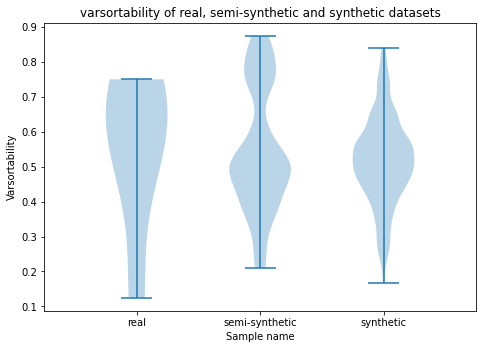

In [79]:
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
def plot_type_violin():
    keys = group_by_type.keys()
    data = [group_by_type[key] for key in keys]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('varsortability of real, semi-synthetic and synthetic datasets')
    ax.set_ylabel('Varsortability')
    ax.violinplot(data)
    set_axis_style(ax, keys)
    plt.subplots_adjust(bottom=0.15, wspace=0.15)
    plt.show()
    
plot_type_violin()    

In [82]:
df.to_csv("datasets_summary_group_and_type.csv", index=False)